In [52]:
import pandas as pd

df = pd.read_csv("../Nal7/university_rank_no_nan.csv", index_col=0, sep=",", decimal=".")
stevilski = df.select_dtypes(exclude=["object"])
list_stevilski = df[stevilski.columns]
stevilski.head()

,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income
University of Oxford,20.664,11.2,95.4,1.0,41.000000,46.000000,54.0,90.5,99.6,98.4,65.5
California Institute of Technology,2.240,6.4,94.5,2.0,30.000000,47.583088,66.0,92.1,97.2,97.9,88.0
University of Cambridge,18.978,10.9,94.4,3.0,37.000000,47.000000,53.0,91.4,98.7,95.8,59.3
Stanford University,16.135,7.3,94.3,4.0,11.086892,43.000000,57.0,92.8,96.4,99.9,66.2
Massachusetts Institute of Technology,11.247,8.6,93.6,5.0,34.000000,39.000000,61.0,90.5,92.4,99.5,86.9


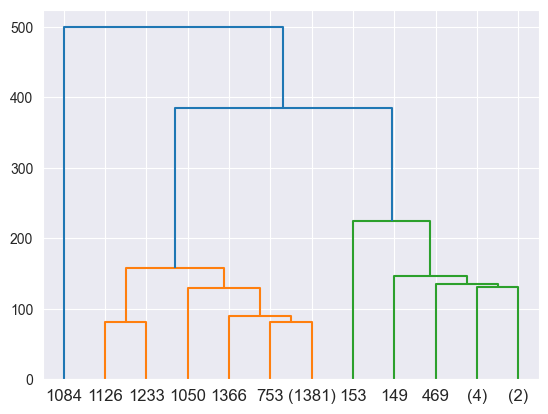

In [58]:
# GRUCE inercija, dendogram

from scipy.cluster.hierarchy import linkage, dendrogram

razdalje = linkage(list_stevilski, "single")
dendrogram(razdalje, orientation="top", p=5, truncate_mode="level")
print()

In [54]:
from sklearn.cluster import KMeans

km= KMeans(n_clusters=2, n_init="auto")
km.fit(list_stevilski)
gruce= km.labels_
st_instanc = {i: sum(gruce == i) for i in range(2)}
print("Število instanc po grucah:", st_instanc)

Število instanc po gručah: {0: 833, 1: 563}


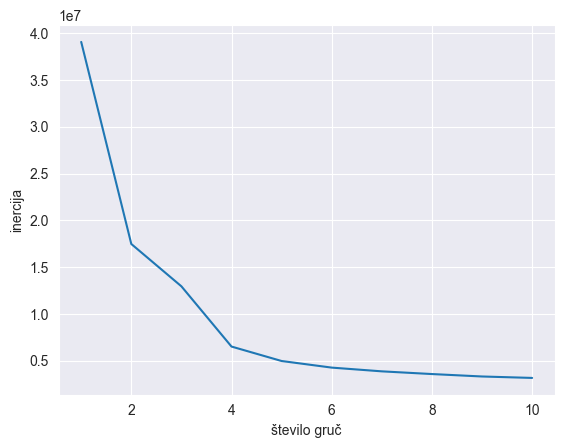

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

inercija = {}
for i in range(1, 11):
    km2 = KMeans(n_clusters=i, n_init="auto")
    km2.fit(list_stevilski)
    inercija[i]=km2.inertia_

sns.lineplot(x= list(inercija.keys()), y=list(inercija.values()))

plt.ylabel("inercija")
plt.xlabel("število gruc")
plt.show()

Prvi komolec se pojavi pri dveh grucah, naslednji pri štirih. Zato je najbolje uporabiti nekje med tema dvema številoma.

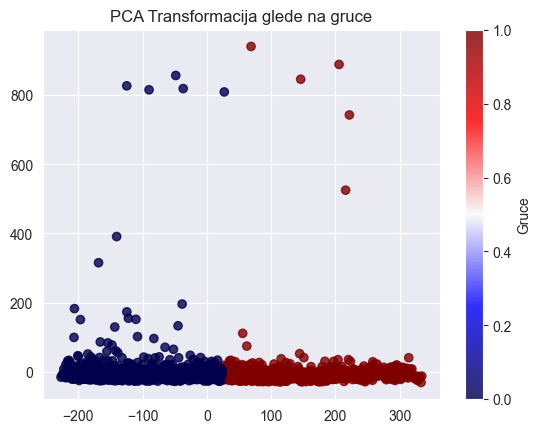

In [73]:
from sklearn.decomposition import PCA

trans_pca = PCA(n_components=2).fit_transform(list_stevilski)

gruce = km.labels_

df_pca = pd.DataFrame(data=trans_pca, columns=["col1", "col2"])
df_pca["gruce"] = gruce

plt.scatter(df_pca["col1"], df_pca["col2"], c=df_pca["gruce"], cmap="seismic", alpha=0.8)
plt.title("PCA Transformacija glede na gruce")
plt.colorbar(label="Gruce")
plt.show()

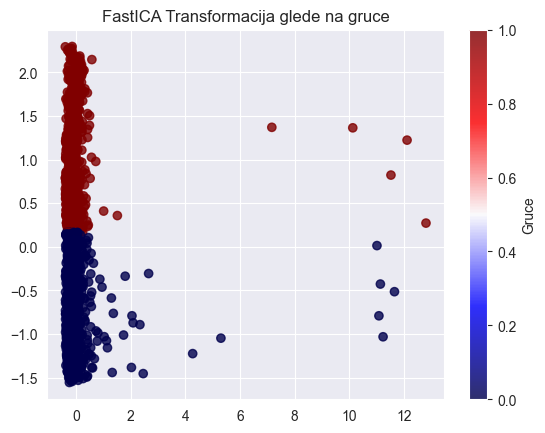

In [68]:
from sklearn.decomposition import FastICA

trans_fastICA = FastICA(n_components=2).fit_transform(list_stevilski)

dfTr = pd.DataFrame(trans_fastICA, columns=["col1", "col2"])
dfTr["gruce"] = gruce

plt.scatter(dfTr["col1"], dfTr["col2"], c=dfTr["gruce"], cmap="seismic", alpha=0.8)
plt.title("FastICA Transformacija glede na gruce")
plt.colorbar(label="Gruce")
plt.show()

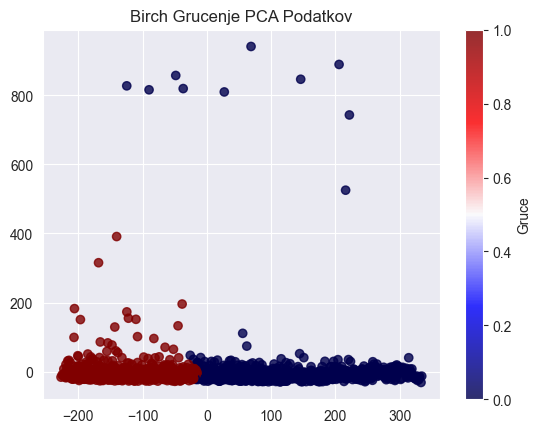

In [75]:
from sklearn.cluster import Birch, SpectralClustering

birch_model = Birch(n_clusters=2)
gruce_birch = birch_model.fit_predict(trans_pca)

plt.scatter(df_pca["col1"], df_pca["col2"], c=gruce_birch, cmap="seismic", alpha=0.8)
plt.title("Birch Grucenje PCA Podatkov")
plt.colorbar(label="Gruce")
plt.show()

C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


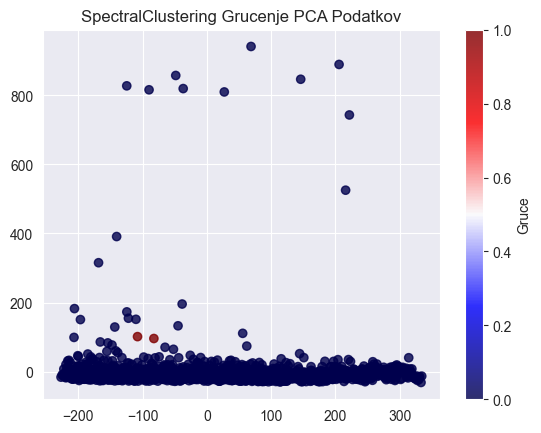

In [78]:
spectral_model = SpectralClustering(n_clusters=2)
gruce_spectral = spectral_model.fit_predict(trans_pca)

plt.scatter(df_pca["col1"], df_pca["col2"], c=gruce_spectral, cmap="seismic", alpha=0.8)
plt.title("SpectralClustering Grucenje PCA Podatkov")
plt.colorbar(label="Gruce")
plt.show()